In [157]:
# liberaries toolkit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the data from medical_examination.csv and assign it to the df variable.


In [158]:
# import data
df = pd .read_csv("medical_examination.csv")

In [159]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [160]:
df.shape

(70000, 13)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.


In [162]:
df['BMI'] = round(df['weight'] / ((df['height'] / 100) ** 2),1)

In [163]:
# df['overweight'] = (df['BMI'] > 25).astype(int)
df['overweight'] = df['BMI'].apply(lambda x : 1 if x >25 else 0)
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0


### Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.


In [164]:
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x <=1 else 1)


In [165]:
df['gluc'] = df['gluc'].apply(lambda x : 0 if x <=1 else 1)

In [166]:
df['cholesterol'].unique()
# df.head()

array([0, 1])

### Draw the Categorical Plot in the draw_cat_plot function.


In [167]:
def draw_cat_plot():
    pass

### Create a DataFrame for the cat plot using pd.melt with values from ``` cholesterol, gluc, smoke, alco, active, and overweight ``` in the df_cat variable.


In [168]:
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'],var_name='variable',value_name='value')
df_cat.head()
df_cat.shape

(420000, 3)

### Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.


In [169]:
df_cat_grouped = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')
df_cat_grouped.head()
df_cat_grouped.shape

(24, 4)

### Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().


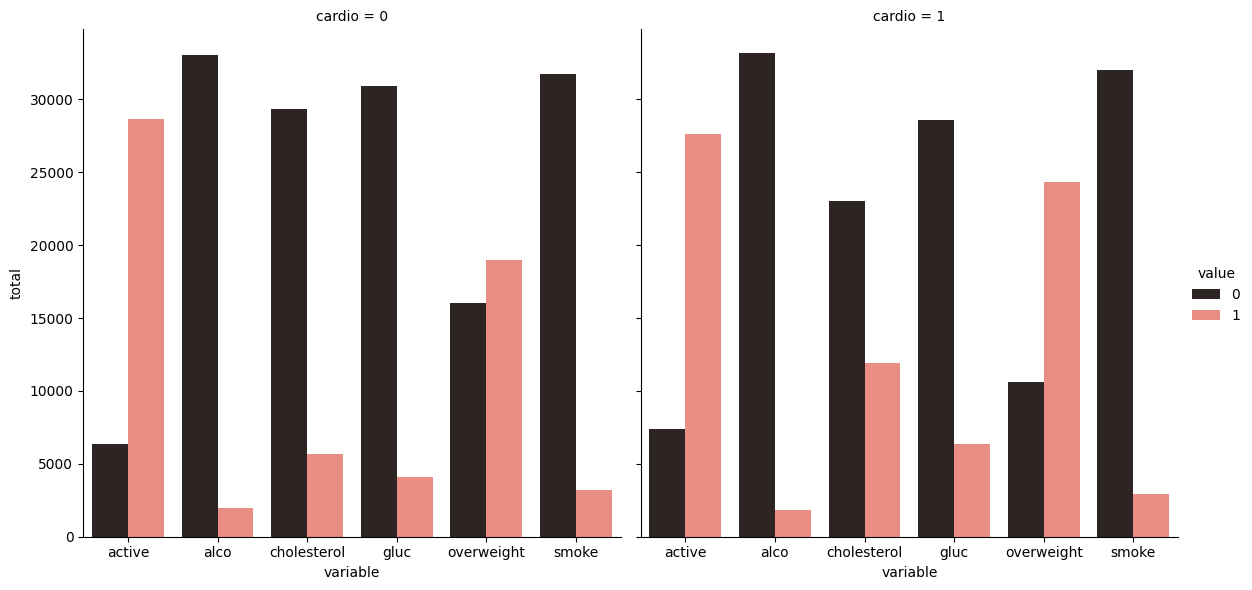

In [170]:
chart = sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat_grouped,kind='bar',palette='dark:salmon',height=6,aspect=1)
fig = chart.fig
plt.show()

### Get the figure for the output and store it in the fig variable.


In [171]:
fig.savefig('catplot.png')

### Draw the Heat Map in the draw_heat_map function.


In [172]:
def draw_heat_map():
    pass

### Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
- diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
- height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
- height is more than the 97.5th percentile
- weight is less than the 2.5th percentile
- weight is more than the 97.5th percentile

In [173]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]
df_heat.head()
# df_heat.shape

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,22.0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.9,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.5,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.7,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.0,0


### Calculate the correlation matrix and store it in the corr variable.
 

In [174]:
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000021,-0.000902
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.110258,0.090586
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.135380,-0.055071
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.265845,-0.153194
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.862849,0.655866
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.024937,0.017456
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.216748,0.172139
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.167384,0.128682
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.121903,0.088988
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.041568,-0.004941


### Generate a mask for the upper triangle and store it in the mask variable.


In [175]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

### Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().


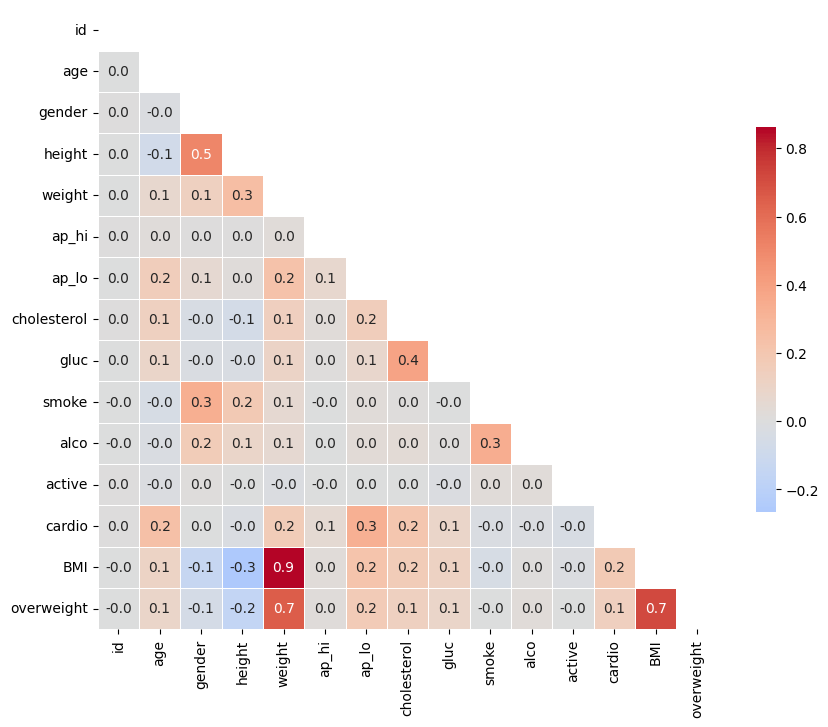

In [176]:
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', center=0, square=True,cmap='coolwarm', linewidths=.5, cbar_kws={"shrink": .5},ax=ax)
plt.show()
fig.savefig('heatmap.png')